<h1><b><center>Will a Customer Accept the Coupon?</center></b></h1>

**Context**

<p>Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?</p>

**Overview**

<p>The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.</p>

**Data**

<p>This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).</p>

**Deliverables**

<p>Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.</p>

<h2><b>Data Description</b></h2>

Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day
---

<h2><b>Import Libraries</b></h2>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import textwrap

<h2><b>Data Loading</b></h2>

Read in the coupons.csv file

In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

---
<h2><b>Data Cleaning</b></h2>

Cleaning the data here by dropping columns and replacing missing values

Also changed data type of age column to int64. 50 represents 50plus, 20 represents below21

In [5]:
# Finding the percentages of missing values here for each column
missing_data = data.isna().mean() * 100
missing_data

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

<br>
<br>
The car column has 99.15% data missing and as a result the column will be dropped from the dataset.

For columns Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, less than 2% of data is missing so the missing values will be replaced with the mode of each column due to these columns being categorical data.

In [6]:
# Dropping car column from dataset
data = data.drop(columns=['car'])

In [7]:
# Replacing values of the 5 columns: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 with mode of column as missing data is less than 2%
columnsToFill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in columnsToFill:
    mode_of_column = data[column].mode()[0]
    print(f'mode of column {column} is {mode_of_column}')
    data[column].fillna(mode_of_column, inplace=True)

mode of column Bar is never
mode of column CoffeeHouse is less1
mode of column CarryAway is 1~3
mode of column RestaurantLessThan20 is 1~3
mode of column Restaurant20To50 is less1


In [8]:
# Verify no values are missing
data.isna().mean()

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
dtype: float64

In [9]:
print('unique values of age:', data.age.unique())

unique values of age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [10]:
# Also noticed age column is categorical - will change it to integer where 50+ is represented by 50 and below21 is 20
map_age = {
    '50plus': 50,
    'below21': 20
}

data['age'] = data['age'].replace(map_age).astype(int)
data.age.unique()

array([21, 46, 26, 31, 41, 50, 36, 20])

---
<h2><b>Data Analysis</b></h2>

<h3><b>Problems/Tasks</b></h3>
<ul>
    <li>What proportion of the total observations chose to accept the coupon?</li>
    <li>Use a bar plot to visualize the `coupon` column.</li>
    <li>Use a histogram to visualize the temperature column.</li>
</ul>

<b>1. What proportion of the total observations chose to accept the coupon?</b>

Proportion of coupons accepted

In [11]:
# Get acceptance rate
total_accepted_coupons = data.Y.mean() 
percentage_accepted_coupons = total_accepted_coupons * 100

print(f"Percentage accepted: {percentage_accepted_coupons:.2f}%")

Percentage accepted: 56.84%


<br>
Proportion of coupons not accepted

In [12]:
# Get count of not accepted
total_not_accepted_coupons = 1 - total_accepted_coupons
percentage_not_accepted_coupons = total_not_accepted_coupons * 100

print(f"Percentage not accepted: {percentage_not_accepted_coupons:.2f}%")

Percentage not accepted: 43.16%


<br>
Pie chart of Accepted Coupons vs Not Accepted Coupons

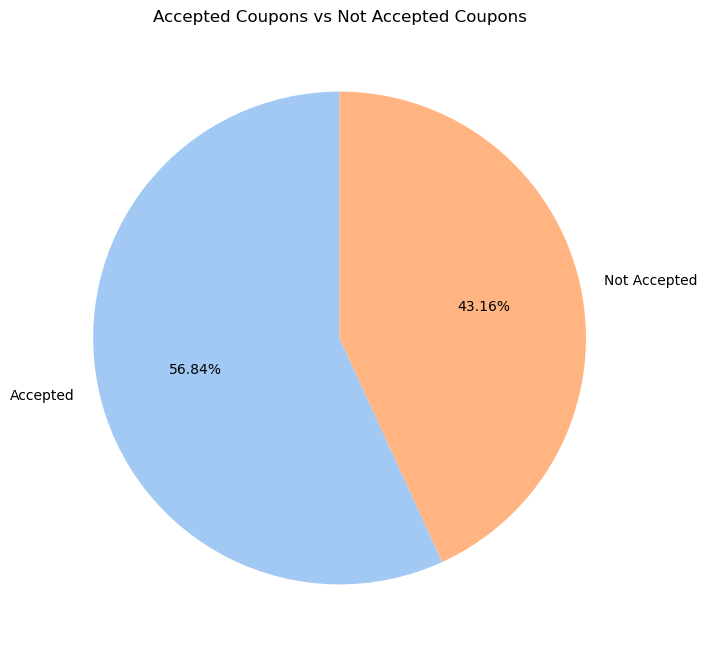

In [13]:
coupons_pie_chart_labels = ['Accepted', 'Not Accepted']
coupons_pie_chart_data = [total_accepted_coupons, total_not_accepted_coupons]
coupons_pie_chart_colors = sns.color_palette('pastel')[0:2]

plt.figure(figsize=(8,8))
plt.pie(coupons_pie_chart_data, labels=coupons_pie_chart_labels, colors=coupons_pie_chart_colors, 
        autopct='%2.2f%%', startangle=90)

plt.title('Accepted Coupons vs Not Accepted Coupons')
plt.show()

The pie chart above shows that 56.84% of the coupons were accepted and 43.16% of the coupons were not accepted

<br>
<b>2. Use a bar plot to visualize the `coupon` column.</b>

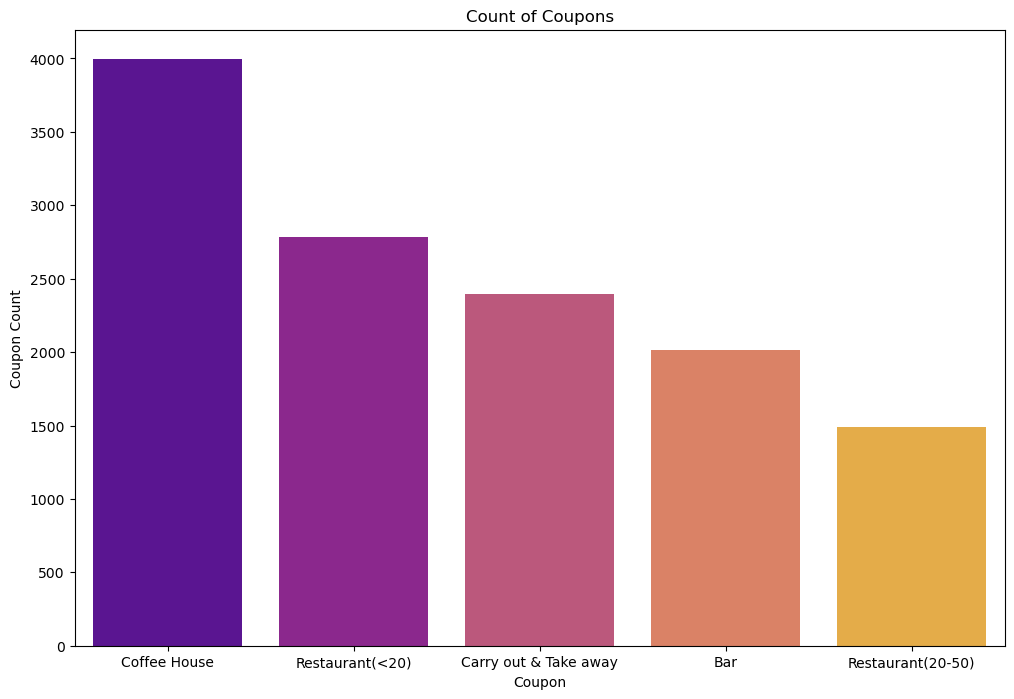

Coupon count for Coffee House is 3996
Coupon count for Restaurant(<20) is 2786
Coupon count for Carry out & Take away is 2393
Coupon count for Bar is 2017
Coupon count for Restaurant(20-50) is 1492


In [14]:
# Grouping by coupon column, getting all counts for each type of coupon, 
# and reset index so that we can have a coupon count column
coupon_df = data.groupby('coupon')[['coupon']].value_counts().reset_index(name='coupon_count')

# Sorting the dataframe so that the graph looks easier to read
coupon_df = coupon_df.sort_values(by='coupon_count', ascending=False)

# plot the data with seaborn
plt.figure(figsize=(12, 8))

sns.barplot(data=coupon_df, x='coupon', y='coupon_count', palette='plasma')
plt.xlabel('Coupon')
plt.ylabel('Coupon Count')
plt.title('Count of Coupons')
plt.show()

# Verifying data count matches graph
for row in coupon_df.itertuples():
    print(f'Coupon count for {row.coupon} is {row.coupon_count}')

<br>
The bar plot above shows the different types of coupons and the number of coupons of each coupon type in the data.
There are 5 types of coupons: Coffee House, Restaurant(<20), Carry out & with Coffee House having the highest number of coupons and Restaurant(20-50) having the least number of coupons.

There are:
<ul>
    <li>3996 Coffee House coupons</li>
    <li>2786 coupons for restaurants that cost less than \$20</li>
    <li>2393 coupons for Carry out & Take away</li>
    <li>2017 coupons for bar</li>
    <li>1492 coupons for restaurants that cost between \$20 and \$50</li>
</ul>

<br>
<b>3. Use a histogram to visualize the temperature column.</b>

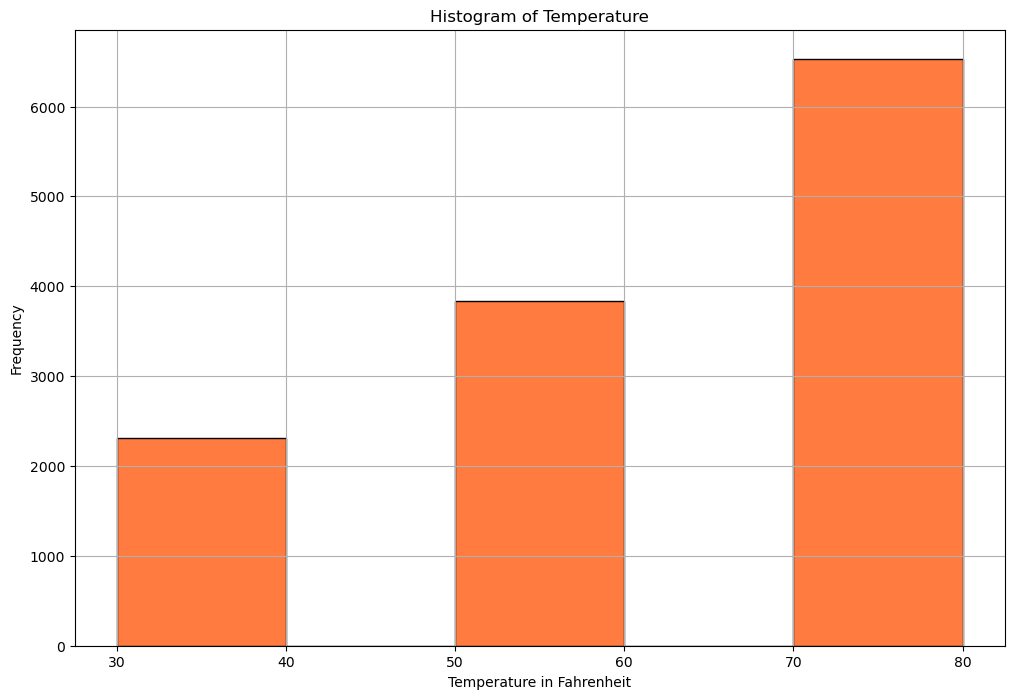

temperature
80             6528
55             3840
30             2316
dtype: int64

In [15]:
# Getting only temperature column
temp_data = data[['temperature']]

# Broke plot into 5 groups as it makes reading the graph easier
plt.figure(figsize=(12, 8))
sns.histplot(data=temp_data, x='temperature', bins=5, color='#FF4F00')

plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.grid(True)
plt.show()

# To verify graphic representation
temp_count = temp_data.value_counts()
temp_count

<br>
Although the temperature data consists of only 3 unique values of 30, 55, 80, the histogram plot above is broken down into 5 temperature intervals. 

The 5 groups are:
<ul>
    <li>30-40</li>
    <li>40-50</li>
    <li>50-60</li>
    <li>60-70</li>
    <li>70-80</li>
</ul>

The plot shows that there are 2316 rows in the dataset where the temperature is between 30-40 fahrenheit (recorded as 30 in dataset), 0 rows where temperature has a value between 40-50 fahrenheit, 33840 rows where temperature is 50-60 fahrenheit (recorded as 55 in dataset), 0 rows where temperature has a value between 60-70 fahrenheit, and 6528 rows where temperature is between 70-80 fahrenheit (recorded as 80 in dataset)

So as temperature increases, frequency increases, indicating that more coupons are probably related to higher temperatures, but it does not mean all coupons are sent out at higher temeperatures. So it is possible that higher temperatures could be dominated by some of the coupons. 
The next graph shows the distribution of coupons by temperature to explain this.

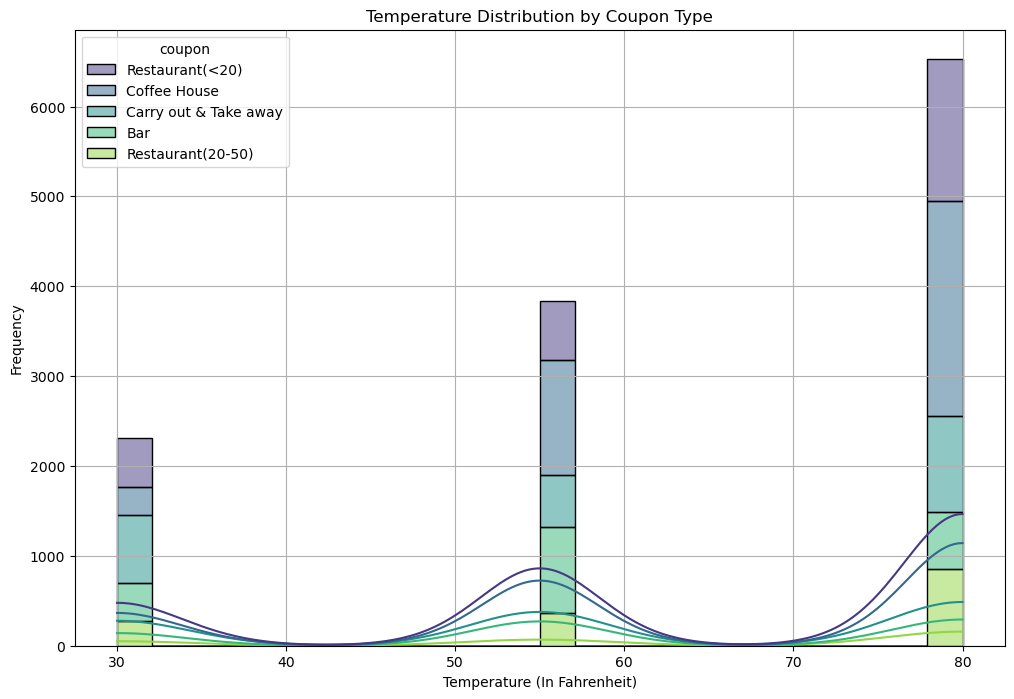

In [16]:
# Graph to show distribution by coupon type
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='temperature', hue='coupon', multiple="stack", kde=True, palette='viridis')
plt.title('Temperature Distribution by Coupon Type')
plt.xlabel('Temperature (In Fahrenheit)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<br>
The Temperature Distribution by Coupon Type graph shows the distribution of coupons for each group of temperature. Gernerally, it looks like as temperature increases (for the data we have), coupons at that temperature that are sent out also increase. There are a few exceptions though. Carry out & Take away coupon is more popular at 30 and 80 degrees. Bar coupon is more popular at 55 degrees. For the other 3 coupon types: Restaurant(<20), Coffee House, and Restaurant(20-50), the coupons that are sent increase as temperature increases.

<h3><b>Investigating the Bar Coupons</b></h3>

In this section, I am comparing the acceptance rate of the groups as prompted within the questions. 

Create a new `DataFrame` that contains just the bar coupons.

In [17]:
bar_coupons_data = data.query('coupon == "Bar"')

<br>
<b>1. What proportion of bar coupons were accepted?</b>

Proportion of bar coupons accepted

In [18]:
# Get total count of accepted
accepted_bar_coupons = bar_coupons_data.Y.mean()
print(f"Percentage bar coupons accepted: {accepted_bar_coupons * 100:.2f}%")

Percentage bar coupons accepted: 41.00%


<br>
Proportion of bar coupons not accepted

In [19]:
# Get count of not accepted coupons
not_accepted_bar_coupons = 1 - accepted_bar_coupons
print(f"Percentage bar coupons not accepted: {not_accepted_bar_coupons * 100:.2f}%")

Percentage bar coupons not accepted: 59.00%


<br>
Pie chart of Accepted Bar Coupons vs Not Accepted Bar Coupons

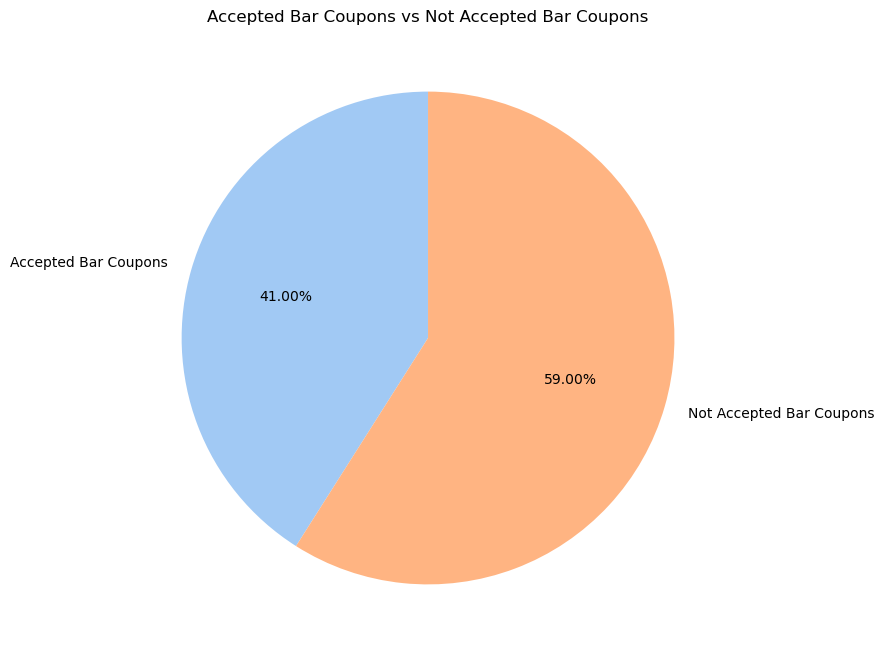

In [20]:
bar_coupons_pie_chart_labels = ['Accepted Bar Coupons', 'Not Accepted Bar Coupons'] 
bar_coupons_pie_chart_data = [accepted_bar_coupons, not_accepted_bar_coupons]
bar_coupons_pie_chart_colors = sns.color_palette('pastel')[0:2]

plt.figure(figsize=(8,8))
plt.pie(bar_coupons_pie_chart_data, labels=bar_coupons_pie_chart_labels, 
        colors=bar_coupons_pie_chart_colors, 
        autopct='%2.2f%%', startangle=90)

plt.title('Accepted Bar Coupons vs Not Accepted Bar Coupons')
plt.show()

The pie chart above shows that 41% of the bar coupons were accepted and 59% of the bar coupons were not accepted

<br>
<b>2. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.</b>

<i>(This is assuming to use the data where coupon is 'Bar')</i>

In [21]:
# simpler way to filter dataset instead of writing it out all the time
def filterDF(df, column, criteria):
    return df[column].isin(criteria)

In [22]:
print('unique Bar values:', bar_coupons_data.Bar.unique())

unique Bar values: ['never' 'less1' '1~3' 'gt8' '4~8']


In [23]:
# Get mean of the number of accepted coupons based on bar visit categories (This is the acceptance rate)
criteria = ['never', 'less1', '1~3']

# Data filtered
visits_3_or_less = bar_coupons_data[filterDF(bar_coupons_data, 'Bar', criteria)]
visits_more_than_3 = bar_coupons_data[~(filterDF(bar_coupons_data, 'Bar', criteria))]

# Verify subsets combined = original dataset
visits_3_or_less.shape[0] + visits_more_than_3.shape[0] == bar_coupons_data.shape[0]

True

In [24]:
# Acceptance rates
acceptance_rate_3_or_less = visits_3_or_less.Y.mean()
acceptance_rate_more = visits_more_than_3.Y.mean()

print(f'acceptance rate for people who went to a bar 3 or fewer times is {acceptance_rate_3_or_less * 100:.2f}%')
print(f'acceptance rate for people who went to a bar more than 3 times is {acceptance_rate_more * 100:.2f}%')

acceptance rate for people who went to a bar 3 or fewer times is 37.07%
acceptance rate for people who went to a bar more than 3 times is 76.88%


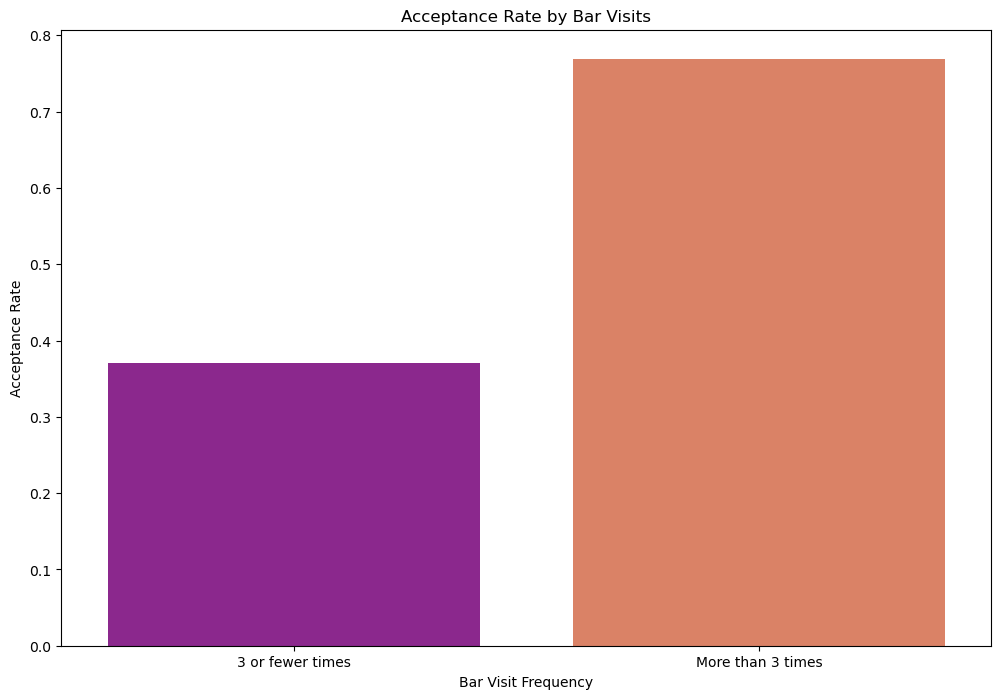

In [25]:
bar_acceptance_rates = pd.DataFrame({
    'Bar Visit': ["3 or fewer times", "More than 3 times"],
    'Acceptance Rate': [acceptance_rate_3_or_less, acceptance_rate_more]
})

plt.figure(figsize=(12, 8))
sns.barplot(data=bar_acceptance_rates, x='Bar Visit', y='Acceptance Rate', palette='plasma')
plt.title('Acceptance Rate by Bar Visits')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')

plt.show()

<br>
The bar plot above shows that the bar coupon acceptance rate of those who went to a bar more than 3 times is significantly higher than those who went to a 3 or fewer times. The acceptance rate for people who went to a bar 3 or fewer times is 37.07%, while acceptance rate of those who went to a bar more than 3 times is 76.88%. 
Overall this shows that frequent bar visitors are more likely to accept a bar coupon than a bar visitor who does not go to one that often.

<br>
<b>3. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?</b>

In [26]:
visit_criteria = ['1~3','gt8' ,'4~8']
bar_visits_over25 = bar_coupons_data[(filterDF(bar_coupons_data, 'Bar', visit_criteria)) & (bar_coupons_data.age > 25)]
bar_visits_all_others = bar_coupons_data[~((filterDF(bar_coupons_data, 'Bar', visit_criteria)) & (bar_coupons_data.age > 25))]

# Verify subsets combined = original dataset
bar_visits_over25.shape[0] + bar_visits_all_others.shape[0] == bar_coupons_data.shape[0]

True

In [27]:
acceptance_rate_over25 = bar_visits_over25.Y.mean()
acceptance_rate_all_others = bar_visits_all_others.Y.mean()

print(f'acceptance rate for people who visit a bar more than once a month and are over the age of 25 is {acceptance_rate_over25*100:.2f}%')
print(f'acceptance rate for all others is {acceptance_rate_all_others*100:.2f}%')

acceptance rate for people who visit a bar more than once a month and are over the age of 25 is 69.52%
acceptance rate for all others is 33.50%


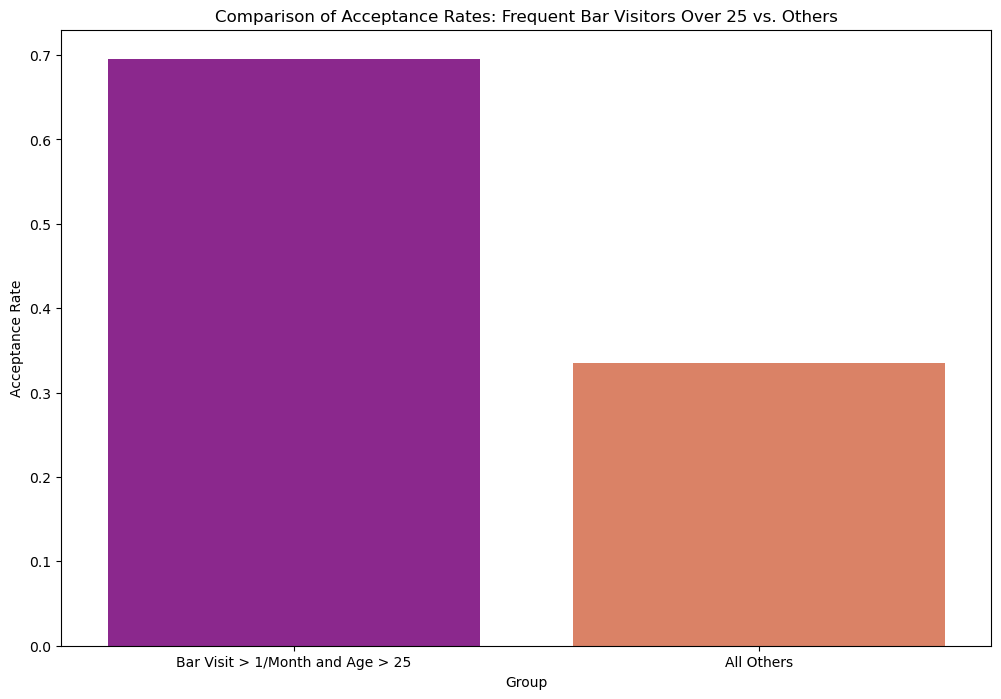

In [28]:
bar_acceptance_rates = pd.DataFrame({
    'Bar Visit': ["Bar Visit > 1/Month and Age > 25", "All Others"],
    'Acceptance Rate': [acceptance_rate_over25, acceptance_rate_all_others]
})

plt.figure(figsize=(12, 8))
sns.barplot(data=bar_acceptance_rates, x='Bar Visit', y='Acceptance Rate', palette='plasma')
plt.title("Comparison of Acceptance Rates: Frequent Bar Visitors Over 25 vs. Others")
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()

The bar plot above compares the bar coupon acceptance rate of people who went to a bar at least once a month and are over the age of 25 to the coupon acceptance rate of rest of the population. This graph shows that this specific age group has a high acceptance rate for the bar coupon, with a acceptance rate of 69.52% and the rest of the population has a acceptance rate of 33.50%. Overall, this indicates that most bar visitors who accept a bar coupon are over the age 25.

<br>
<b>4. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry against all others.</b>

In [29]:
print('unique values of Occupation:', bar_coupons_data.occupation.unique())
print('')
print('unique values of passanger:', bar_coupons_data.passanger.unique())

unique values of Occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']

unique values of passanger: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']


In [30]:
visit_criteria = ['1~3','4~8', 'gt8']

visits_without_farm_occupation = bar_coupons_data[
    (filterDF(bar_coupons_data, 'Bar', visit_criteria)) & 
    (bar_coupons_data.passanger != 'Kid(s)') & 
    (bar_coupons_data.occupation != 'Farming Fishing & Forestry')]

all_other_visits = bar_coupons_data[~(
    (filterDF(bar_coupons_data, 'Bar', visit_criteria)) & 
    (bar_coupons_data.passanger != 'Kid(s)') & 
    (bar_coupons_data.occupation != 'Farming Fishing & Forestry'))]

# verify subsets added together = the original dataset
visits_without_farm_occupation.shape[0] + all_other_visits.shape[0] == bar_coupons_data.shape[0]

True

In [31]:
acceptance_rate_without_farm_occ = visits_without_farm_occupation.Y.mean()
acceptance_rate_all_others = all_other_visits.Y.mean()

print(f'acceptance rate for frequent bar visitors without a kid passenger and farming, fishing, or forestry occupation is {acceptance_rate_without_farm_occ*100:.2f}%')
print(f'acceptance rate for all others is {acceptance_rate_all_others*100:.2f}%')

acceptance rate for frequent bar visitors without a kid passenger and farming, fishing, or forestry occupation is 71.32%
acceptance rate for all others is 29.60%


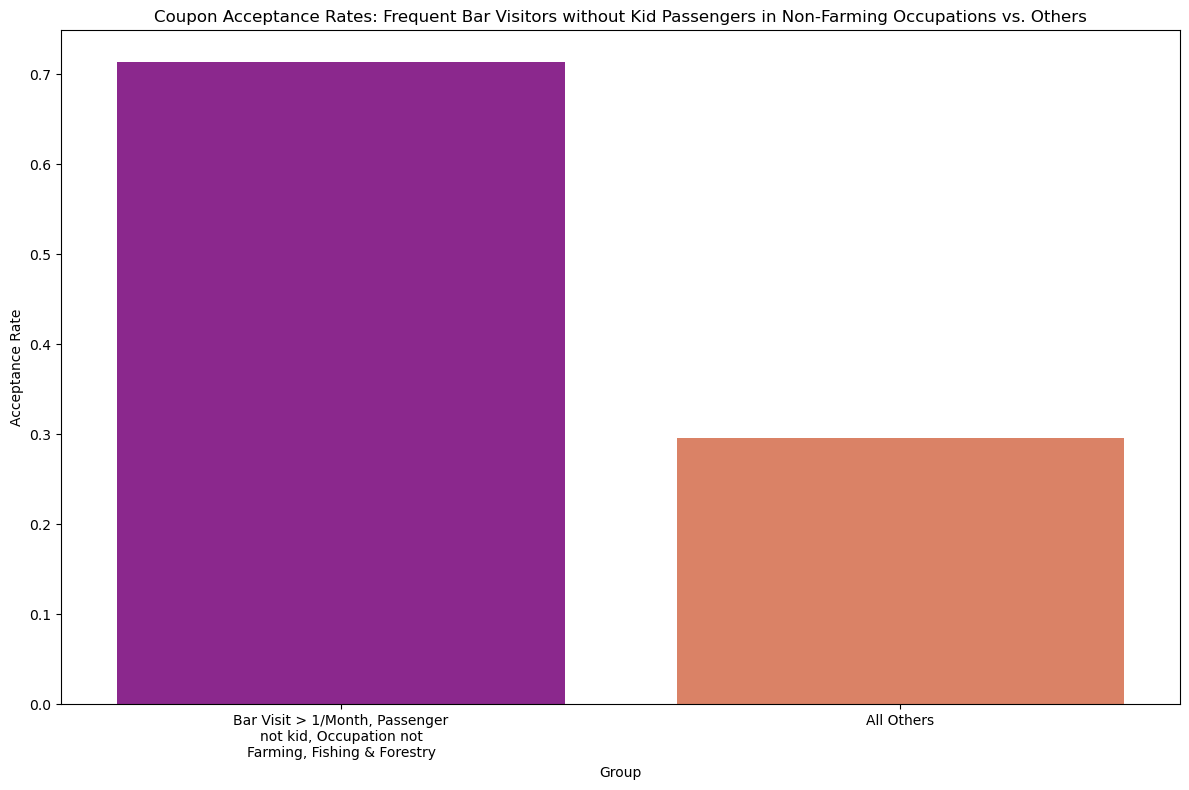

In [32]:
bar_acceptance_rates = pd.DataFrame({
    'Group': ['Bar Visit > 1/Month, Passenger not kid, Occupation not Farming, Fishing & Forestry', 'All Others'],
    'Acceptance Rate': [acceptance_rate_without_farm_occ, acceptance_rate_all_others]
})
bar_acceptance_rates['wrapped_labels'] = ['\n'.join(textwrap.wrap(label, width=30)) for label in bar_acceptance_rates.Group]
plt.figure(figsize=(12, 8))
sns.barplot(data=bar_acceptance_rates, x='wrapped_labels', y='Acceptance Rate', palette="plasma")
plt.title('Coupon Acceptance Rates: Frequent Bar Visitors without Kid Passengers in Non-Farming Occupations vs. Others')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.tight_layout()
plt.show()

The bar plot above compares the acceptance rates of those who go to a bar more than once a month, but did not have a kid as a passenger and did not have an occupation of farming, fishing, and forestry, to the rest of the population. This shows a acceptance rate of 71.32% for those who went to the bar more than once a month, passenger not a kid, occupation not farming or fishing or forestry and a acceptance rate of 29.60% for the rest. 

Overall, it is hard to really give much of a conclusion from this because there are too many attributes that were not filtered out. All that can be concluded is that the high acceptance rate comes from frequent bar visitors who have other occupations and not kid passengers

<br>
<b>5. Compare the acceptance rates between those drivers who:
    <ul>
        <li>go to bars more than once a month, had passengers that were not a kid, and were not widowed <i>OR</i></li>
        <li>go to bars more than once a month and are under the age of 30 <i>OR</i></li>
        <li>go to cheap restaurants more than 4 times a month and income is less than 50K.</li>
    </ul>
</b>

In [33]:
# unique values
print('unique values of bar:', bar_coupons_data.Bar.unique())
print('')
print('unique values of passanger:', bar_coupons_data.passanger.unique())
print('')
print('unique values of marital status:', bar_coupons_data.maritalStatus.unique())
print('')
print('unique values of age:', bar_coupons_data.age.unique())
print('')
print('unique values of cheap restaurant', bar_coupons_data.RestaurantLessThan20.unique())
print('')
print('unique values of income:', bar_coupons_data.income.unique())

unique values of bar: ['never' 'less1' '1~3' 'gt8' '4~8']

unique values of passanger: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']

unique values of marital status: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

unique values of age: [21 46 26 31 41 50 36 20]

unique values of cheap restaurant ['4~8' '1~3' 'less1' 'gt8' 'never']

unique values of income: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [34]:
bar_visit_criteria = ['1~3','4~8', 'gt8']
restaurant_visit_criteria = ['4~8', 'gt8']
income_criteria = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']

criteria1 = (
    (filterDF(bar_coupons_data, 'Bar', bar_visit_criteria)) & 
     (bar_coupons_data.passanger != 'Kid(s)') & 
     (bar_coupons_data.maritalStatus != 'Widowed'))

criteria2 = (
    (filterDF(bar_coupons_data, 'Bar', bar_visit_criteria)) & 
    (bar_coupons_data.age < 30))

criteria3 = (
    (filterDF(bar_coupons_data, 'RestaurantLessThan20', restaurant_visit_criteria)) & 
    (filterDF(bar_coupons_data, 'income', income_criteria))
)

combined_criteria = criteria1 | criteria2 | criteria3

bar_and_restaurant_coupons = bar_coupons_data[combined_criteria]
all_others = bar_coupons_data[~combined_criteria]

# Verify subsets add to original
bar_and_restaurant_coupons.shape[0] + all_others.shape[0] == bar_coupons_data.shape[0]

True

In [35]:
acceptance_rate_bar_and_restaurant = bar_and_restaurant_coupons.Y.mean()
acceptance_rate_all_others = all_others.Y.mean()

print(f'acceptance rate of a person who meets at least one of the criteria is {acceptance_rate_bar_and_restaurant*100:.2f}%')
print(f'acceptance rate of everyone else is {acceptance_rate_all_others * 100:.2f}%')

acceptance rate of a person who meets at least one of the criteria is 58.89%
acceptance rate of everyone else is 29.81%


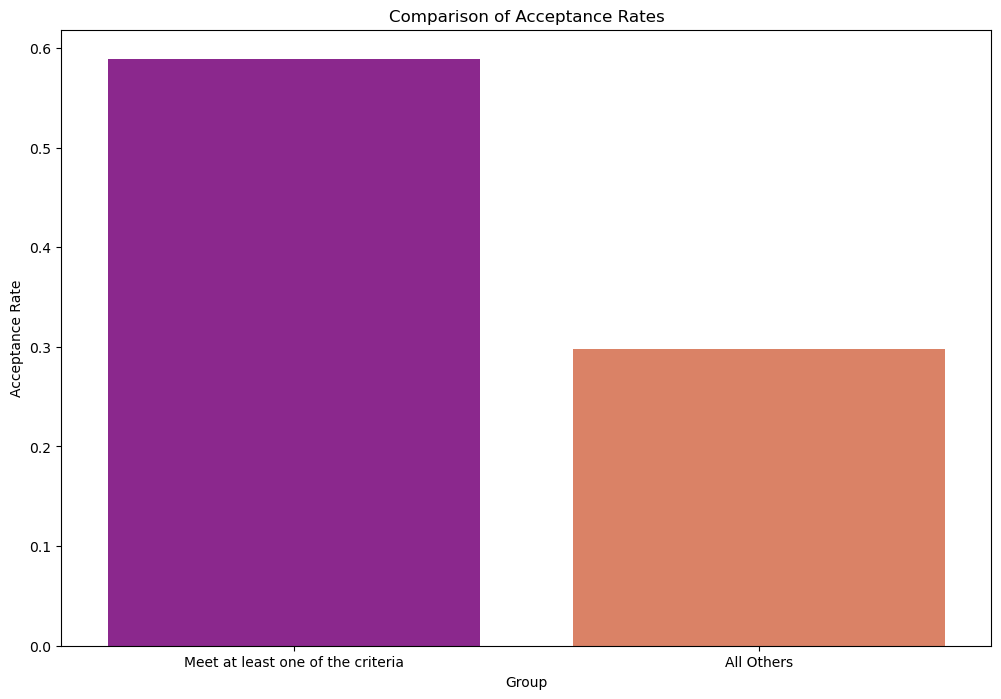

In [36]:
bar_acceptance_rates = pd.DataFrame({
    'Group': ["Meet at least one of the criteria", "All Others"],
    'Acceptance Rate': [acceptance_rate_bar_and_restaurant, acceptance_rate_all_others]
})

plt.figure(figsize=(12, 8))
sns.barplot(data=bar_acceptance_rates, x='Group', y='Acceptance Rate', palette='plasma')
plt.title("Comparison of Acceptance Rates")
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()

The bar plot above shows that someone who meets at least one of the criteria below are more likely to accept the coupon than someone who does not. 
<ul>
    <li>go to bars more than once a month, had passengers that were not a kid, and were not widowed <i>OR</i></li>
    <li>go to bars more than once a month and are under the age of 30 <i>OR</i></li>
    <li>go to cheap restaurants more than 4 times a month and income is less than 50K.</li>
</ul>

The acceptance rate of someone who meets one of the conditions is 58.89% and someone who does not is 29.81%.

<br>
<b>6. Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?</b>

Based on the observations, what I can hypothesize about the drivers who accepted the bar coupons are likely to be frequent bar visitors under the age of 30 who visit the bar more than once a month. They are also likely to not travel with kids and be widowed, indicating these drivers probably have more social freedom as they visit bars a lot. They are also more likely to accept bar coupons if income is less than 50k indicating that the drivers are likely to be conscious about spending money.

<h3><b>Independent Investigation</b></h3>

For the independent investigation, I will be finding the characteristics of drivers who are likely to accept coffee house coupons. 

<b>First, I will create a dateframe of just coffee house coupons</b>

In [37]:
coffee_coupons = data.query('coupon == "Coffee House"')

In [38]:
coffee_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   int64 
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3996 non-null   object
 15  CoffeeHouse           3996 non-null  

<br>
<b>Now we will see the overall coffee house coupon acceptance rate and deny rate.</b>

<br>
Proportion of coffee house coupons accepted

In [39]:
# Get total count of accepted
accepted_coffee = coffee_coupons.Y.mean()
print(f"Percentage coffee house coupons accepted: {accepted_coffee * 100:.2f}%")

Percentage coffee house coupons accepted: 49.92%


<br>
Proportion of coffee house coupons not accepted

In [40]:
# Get total count of not accepted
not_accepted_coffee = 1 - accepted_coffee
print(f"Percentage coffee house coupons not accepted: {not_accepted_coffee * 100:.2f}%")

Percentage coffee house coupons not accepted: 50.08%


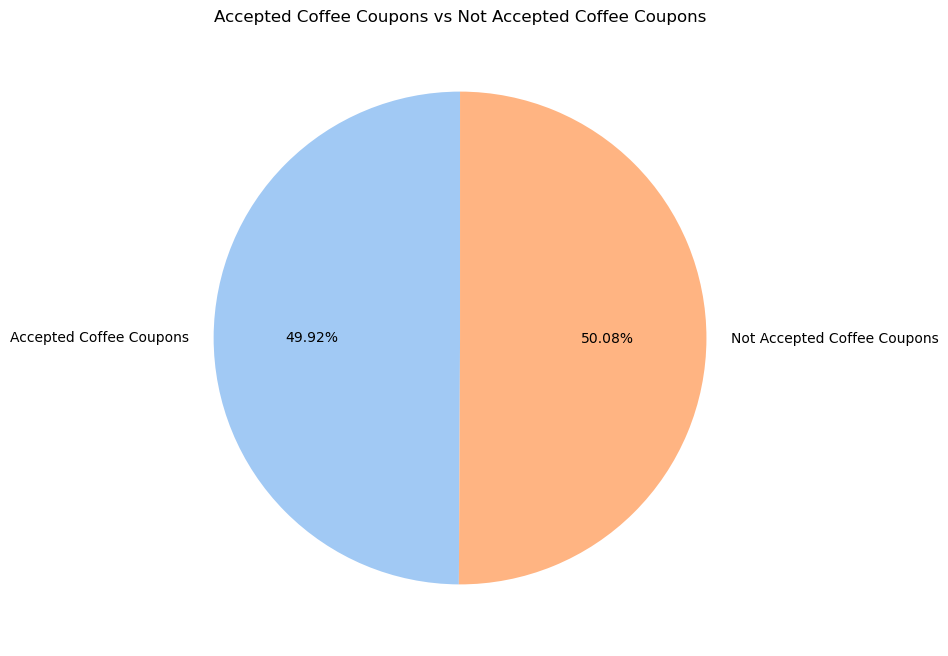

In [41]:
coffee_coupons_pie_chart_labels = ['Accepted Coffee Coupons', 'Not Accepted Coffee Coupons'] 
coffee_coupons_pie_chart_data = [accepted_coffee, not_accepted_coffee]
coffee_coupons_pie_chart_colors = sns.color_palette('pastel')[0:2]

plt.figure(figsize=(8,8))
plt.pie(coffee_coupons_pie_chart_data, labels=coffee_coupons_pie_chart_labels, 
        colors=coffee_coupons_pie_chart_colors, 
        autopct='%2.2f%%', startangle=90)

plt.title('Accepted Coffee Coupons vs Not Accepted Coffee Coupons')
plt.show()

<br>
The overall acceptance rate as shown by the pie chart is 49.92% and a denial rate of 50.08%

<br>
<b>We will also look at some distributions of some characteristics such as age, children, and destination and conduct further exploration based on these attributes.</b>

Age Distribution in percentages:
21    22.097097
26    21.096096
31    15.590591
50    13.638639
36    10.060060
41     8.133133
46     5.505506
20     3.878879
Name: age, dtype: float64


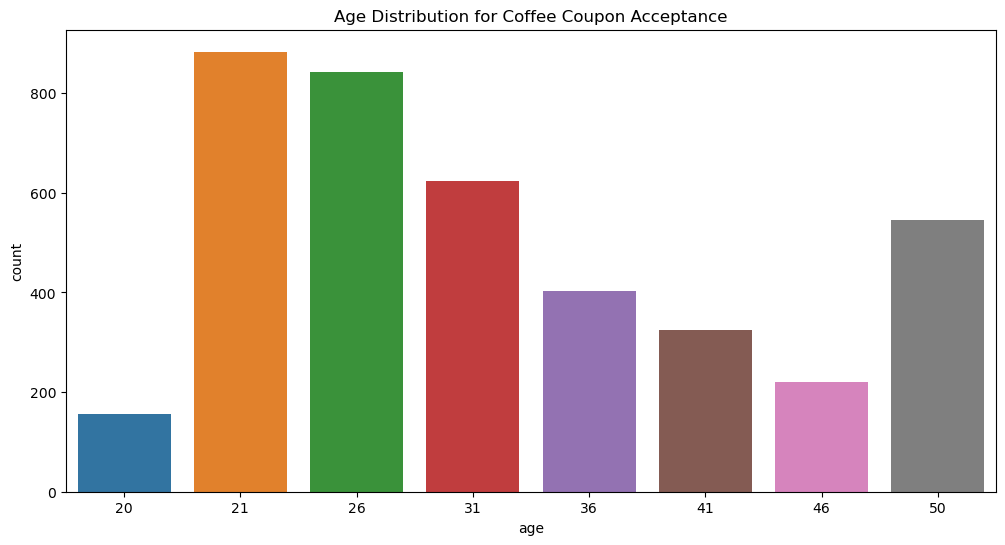

In [42]:
# Age Distribution
age_distribution = coffee_coupons.age.value_counts(normalize=True) * 100
print("Age Distribution in percentages:")
print(age_distribution)

# Note: 50 represents 50+ and 20 represents <21
plt.figure(figsize=(12, 6))
sns.countplot(data=coffee_coupons, x='age')
plt.title('Age Distribution for Coffee Coupon Acceptance')
plt.show()

Has Children Distribution in percentages:
0    61.211211
1    38.788789
Name: has_children, dtype: float64


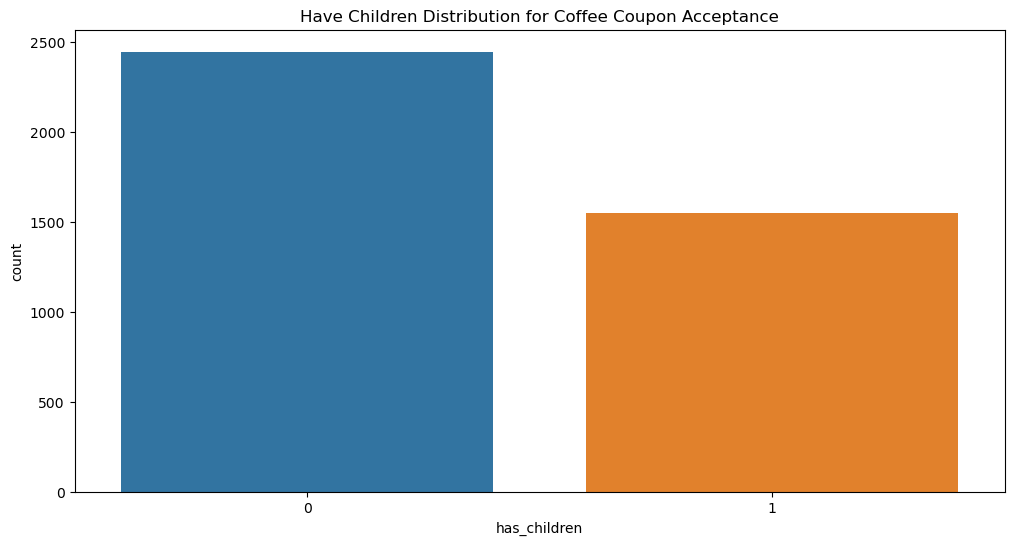

In [43]:
# Has Children Distribution
children_distribution = coffee_coupons.has_children.value_counts(normalize=True) * 100
print("Has Children Distribution in percentages:")
print(children_distribution)


plt.figure(figsize=(12, 6))
sns.countplot(data=coffee_coupons, x='has_children')
plt.title('Have Children Distribution for Coffee Coupon Acceptance')
plt.show()

Destination Distribution in percentages:
No Urgent Place    53.928929
Home               23.223223
Work               22.847848
Name: destination, dtype: float64


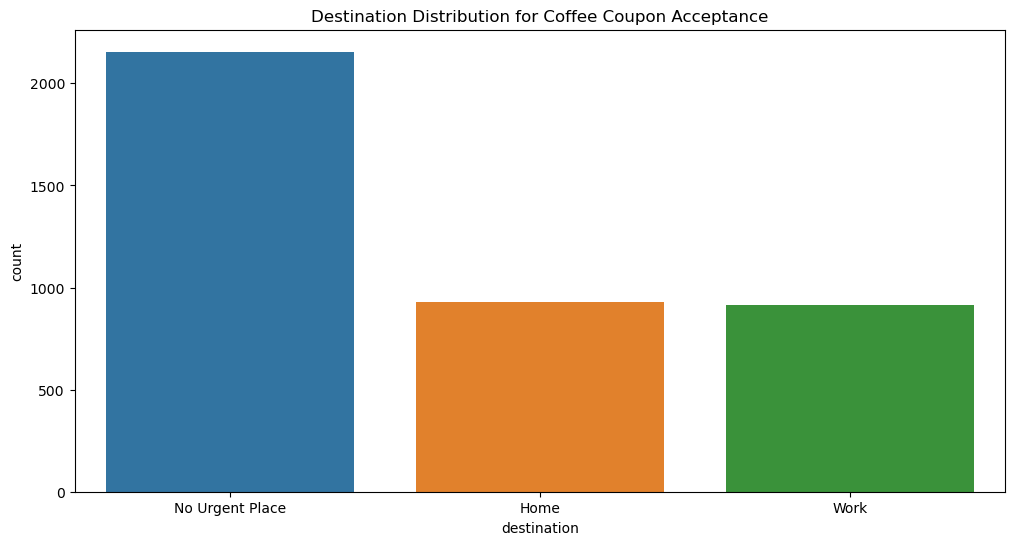

In [44]:
# Destination Distribution
destination_distribution = coffee_coupons.destination.value_counts(normalize=True) * 100
print("Destination Distribution in percentages:")
print(destination_distribution)


plt.figure(figsize=(12, 6))
sns.countplot(data=coffee_coupons, x='destination')
plt.title('Destination Distribution for Coffee Coupon Acceptance')
plt.show()

<br>
<b>Next we will compare the acceptance rate of people who go to coffee house more than 3 or fewer times a month to those who go to a coffee house more than 3 times a month</b>

In [45]:
print('unique coffee house values:', coffee_coupons.CoffeeHouse.unique())

unique coffee house values: ['never' 'less1' '4~8' '1~3' 'gt8']


In [46]:
# Get mean of the number of accepted coupons based on number of visits
criteria = ['never', 'less1', '1~3']

# Data filtered
visits_3_or_less = coffee_coupons[filterDF(coffee_coupons, 'CoffeeHouse', criteria)]
visits_more_than_3 = coffee_coupons[~(filterDF(coffee_coupons, 'CoffeeHouse', criteria))]

# Verify subsets combined = original dataset
visits_3_or_less.shape[0] + visits_more_than_3.shape[0] == coffee_coupons.shape[0]

True

In [47]:
# Acceptance rates
acceptance_rate_3_or_less = visits_3_or_less.Y.mean()
acceptance_rate_more = visits_more_than_3.Y.mean()

print(f'acceptance rate for people who went to a coffee house 3 or fewer times is {acceptance_rate_3_or_less * 100:.2f}%')
print(f'acceptance rate for people who went to a coffee house more than 3 times is {acceptance_rate_more * 100:.2f}%')

acceptance rate for people who went to a coffee house 3 or fewer times is 44.96%
acceptance rate for people who went to a coffee house more than 3 times is 67.50%


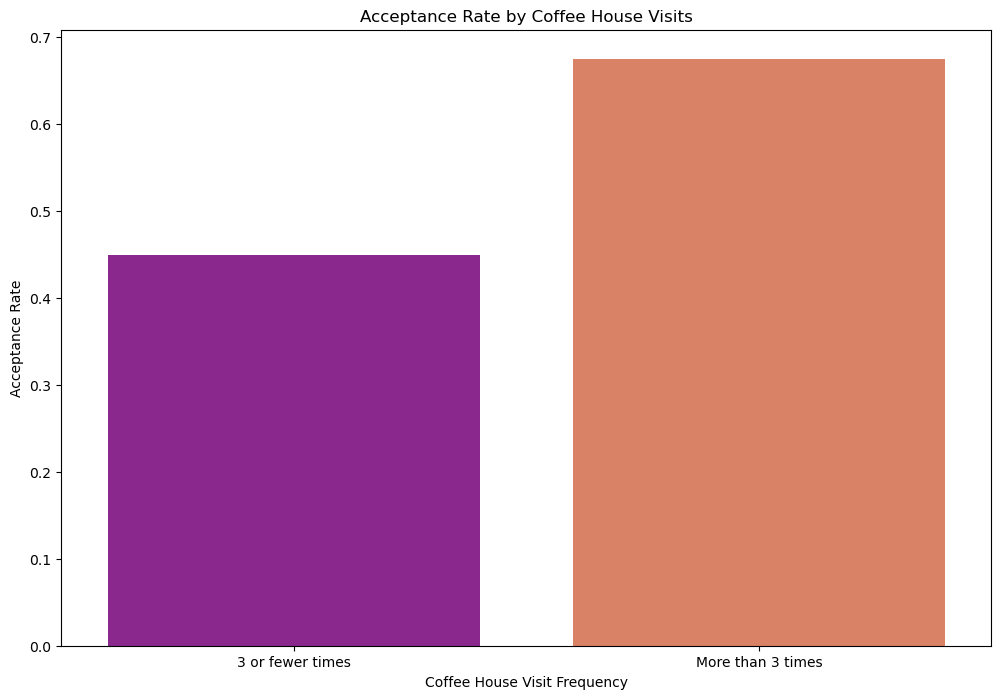

In [48]:
coffee_acceptance_rates = pd.DataFrame({
    'Coffee House Visit': ["3 or fewer times", "More than 3 times"],
    'Acceptance Rate': [acceptance_rate_3_or_less, acceptance_rate_more]
})

plt.figure(figsize=(12, 8))
sns.barplot(data=coffee_acceptance_rates, x='Coffee House Visit', y='Acceptance Rate', palette='plasma')
plt.title('Acceptance Rate by Coffee House Visits')
plt.xlabel('Coffee House Visit Frequency')
plt.ylabel('Acceptance Rate')

plt.show()

<br>
The bar graph above shows that people who visit coffee house more than 3 times a month are more likely to accept coffee house coupons than people who go to a coffee house 3 or less times a month. The acceptance rate of coffee house coupons for people who visit more than 3 times a month is 67.50% and acceptance rate for 3 or less times a month is 44.96%

<br>
<b>The next characteristic we will factor in is age and compare the acceptance rate of coffee house visitors who visit coffee house at least once a month and less than the age of 37 to the rest of the population.</b>

In [49]:
criteria = ['1~3', '4~8', 'gt8']

# Subsets of the data
coffee_37_less = coffee_coupons[(filterDF(coffee_coupons, 'CoffeeHouse', criteria)) & (coffee_coupons.age < 37)]
coffee_others = coffee_coupons[~((filterDF(coffee_coupons, 'CoffeeHouse', criteria)) & (coffee_coupons.age < 37))]

# Verify subsets added = original
coffee_37_less.shape[0] + coffee_others.shape[0] == coffee_coupons.shape[0]

True

In [50]:
acceptance_rate_37 = coffee_37_less.Y.mean()
acceptance_rate_others = coffee_others.Y.mean()

print(f'acceptance rate of coffee house visitors who visit at least once a month and under the age of 37 is {acceptance_rate_37 * 100:.2f}%')
print(f'acceptance rate of all others is {acceptance_rate_others * 100:.2f}%')

acceptance rate of coffee house visitors who visit at least once a month and under the age of 37 is 66.71%
acceptance rate of all others is 40.45%


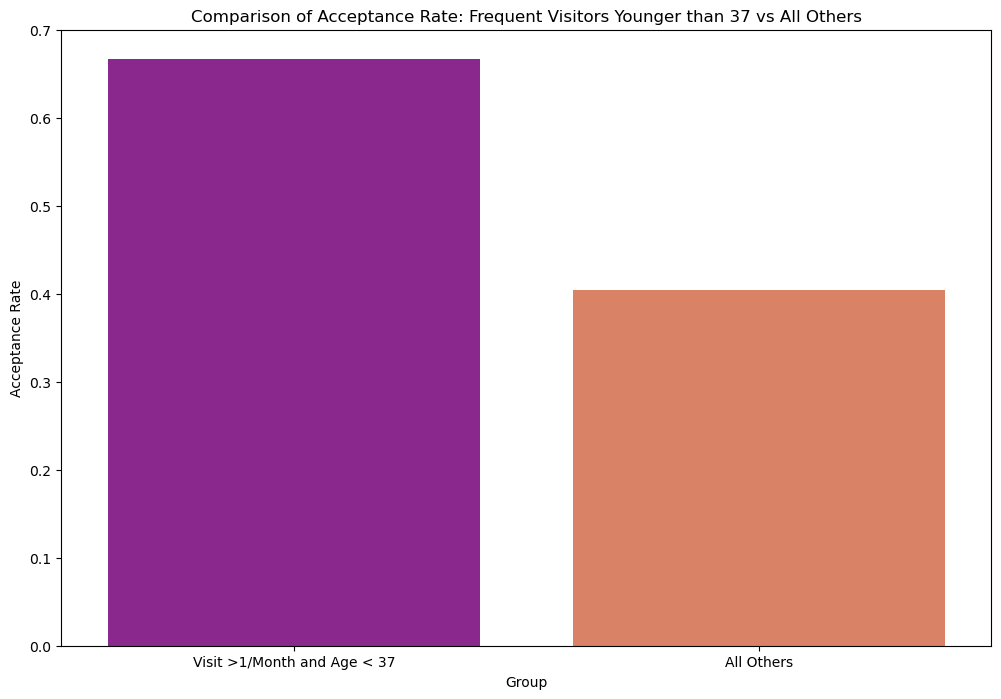

In [51]:
coffee_acceptance_rates = pd.DataFrame({
    'Group': ['Visit >1/Month and Age < 37', 'All Others'],
    'Acceptance Rate': [acceptance_rate_37, acceptance_rate_others]
})

plt.figure(figsize=(12, 8))
sns.barplot(data=coffee_acceptance_rates, x='Group', y='Acceptance Rate', palette='plasma')
plt.title('Comparison of Acceptance Rate: Frequent Visitors Younger than 37 vs All Others')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')

plt.show()

When looking at the bar graph above, we see that majority of the coffee house visitors who accept a coupon and are frequent visitors are under the age of 37, as seen by bar graph. The acceptance rate of people who visit coffee house frequently and are under the age of 37 is 66.71% while the acceptance rate of everyone else is 40.45%

<br>
<b>The next attribute that we will look at is the acceptance rate of frequent coffee house visitors under the age of 37 when the destination is Home or Work compared to everyone else</b>

In [52]:
coffee_coupons.destination.unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [53]:
visits = ['1~3', '4~8', 'gt8']
destination = ['Home', 'Work']
criterias = (
    (filterDF(coffee_coupons, 'CoffeeHouse', visits)) &
    (coffee_coupons.age < 37) & 
    (filterDF(coffee_coupons, 'destination', destination))
)

coffee_destination_group = coffee_coupons[criterias]
coffee_all_others = coffee_coupons[~criterias]

# Verify subsets added together = original
coffee_destination_group.shape[0] + coffee_all_others.shape[0] == coffee_coupons.shape[0]

True

In [54]:
acceptance_rate_dest = coffee_destination_group.Y.mean()
acceptance_rate_others = coffee_all_others.Y.mean()
print(f'acceptance rate of frequent coffee house visitors under the age of 37 based on Home or Work destination is {acceptance_rate_dest*100:.2f}%')
print(f'acceptance rate of all others is {acceptance_rate_others*100:.2f}%')

acceptance rate of frequent coffee house visitors under the age of 37 based on Home or Work destination is 57.01%
acceptance rate of all others is 48.50%


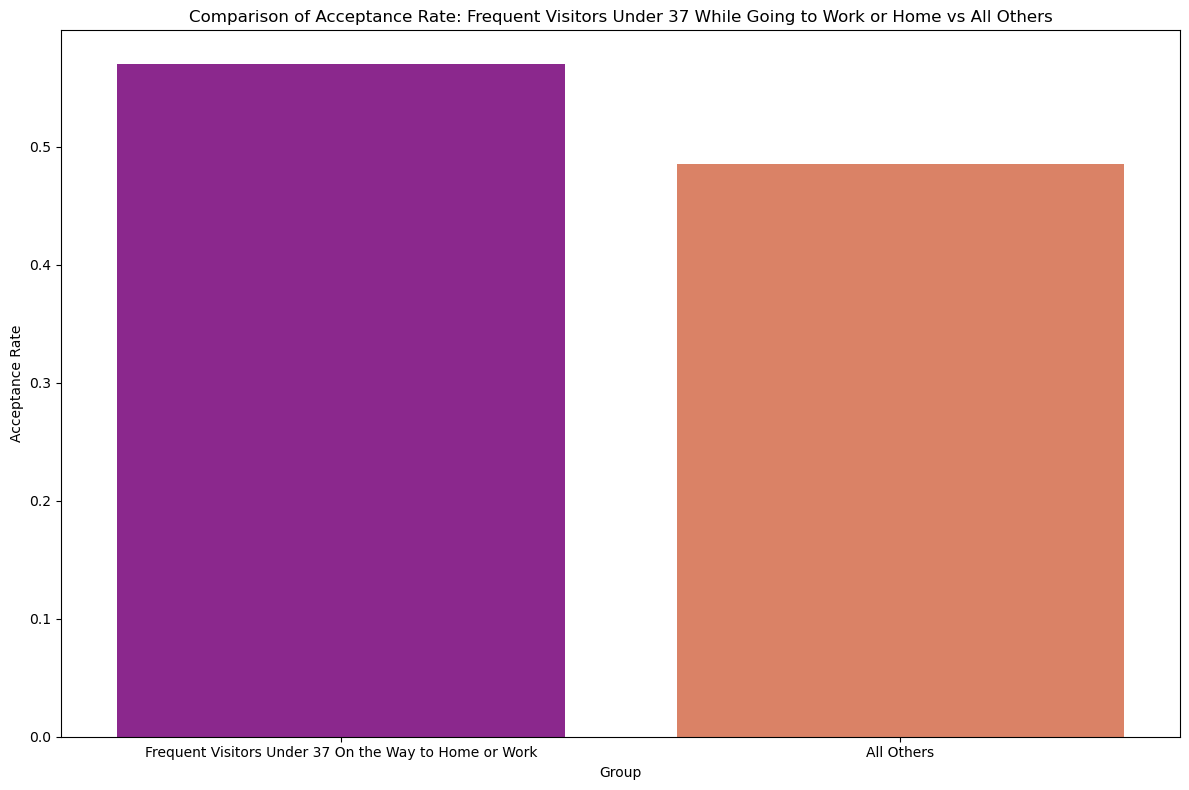

In [55]:
coffee_acceptance_rates = pd.DataFrame({
    'Group': ['Frequent Visitors Under 37 On the Way to Home or Work', 'All Others'],
    'Acceptance Rate': [acceptance_rate_dest, acceptance_rate_others]
})

plt.figure(figsize=(12, 8))
sns.barplot(data=coffee_acceptance_rates, x='Group', y='Acceptance Rate', palette='plasma')
plt.title('Comparison of Acceptance Rate: Frequent Visitors Under 37 While Going to Work or Home vs All Others')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

<br>
Based on this observation, we can say that frequent coffee house visitors who are under the age of 37 and have a destination of either work or home, are more likely to accept a coffee house coupon compared to everyone else. The acceptance rate for this is 57.01% and the acceptance rate for the rest of the population is 48.50%.

<br>
<b>The final comparison we will look at is comparing people who:
    <ul>
        <li>Visit coffee house at least once a month and do not have children and are single or unmarried OR</li>
        <li>Visit coffee house at least once a month, under the age of 37, and on the way to home or work</li>
    </ul>
    against all others.
</b>

In [56]:
coffee_coupons.maritalStatus.unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [57]:
visit_criteria = ['1~3', '4~8', 'gt8']
marital_criteria = ['Single', 'Unmarried partner']
destination_criteria = ['Home', 'Work']


criteria1 = (
    (filterDF(coffee_coupons, 'CoffeeHouse', visit_criteria)) &
    (coffee_coupons.has_children == 0) &
    (filterDF(coffee_coupons, 'maritalStatus', marital_criteria))
)

criteria2 = (
    (filterDF(coffee_coupons, 'CoffeeHouse', visit_criteria)) &
    (coffee_coupons.age < 37) &
    (filterDF(coffee_coupons, 'destination', destination_criteria))
)

combined_criteria = criteria1 | criteria2

coffee_crit1_crit2 = coffee_coupons[combined_criteria]
coffee_all_others = coffee_coupons[~combined_criteria]

# Verify subsets added together = original
coffee_crit1_crit2.shape[0] + coffee_all_others.shape[0] == coffee_coupons.shape[0]

True

In [58]:
acceptance_rate_crit1_crit2 = coffee_crit1_crit2.Y.mean()
acceptance_rate_all_others = coffee_all_others.Y.mean()

print(f'acceptance rate of drivers who meet at least one of the criteria is {acceptance_rate_crit1_crit2*100:.2f}%')
print(f'acceptance rate of all others is {acceptance_rate_all_others*100:.2f}%')

acceptance rate of drivers who meet at least one of the criteria is 65.46%
acceptance rate of all others is 42.89%


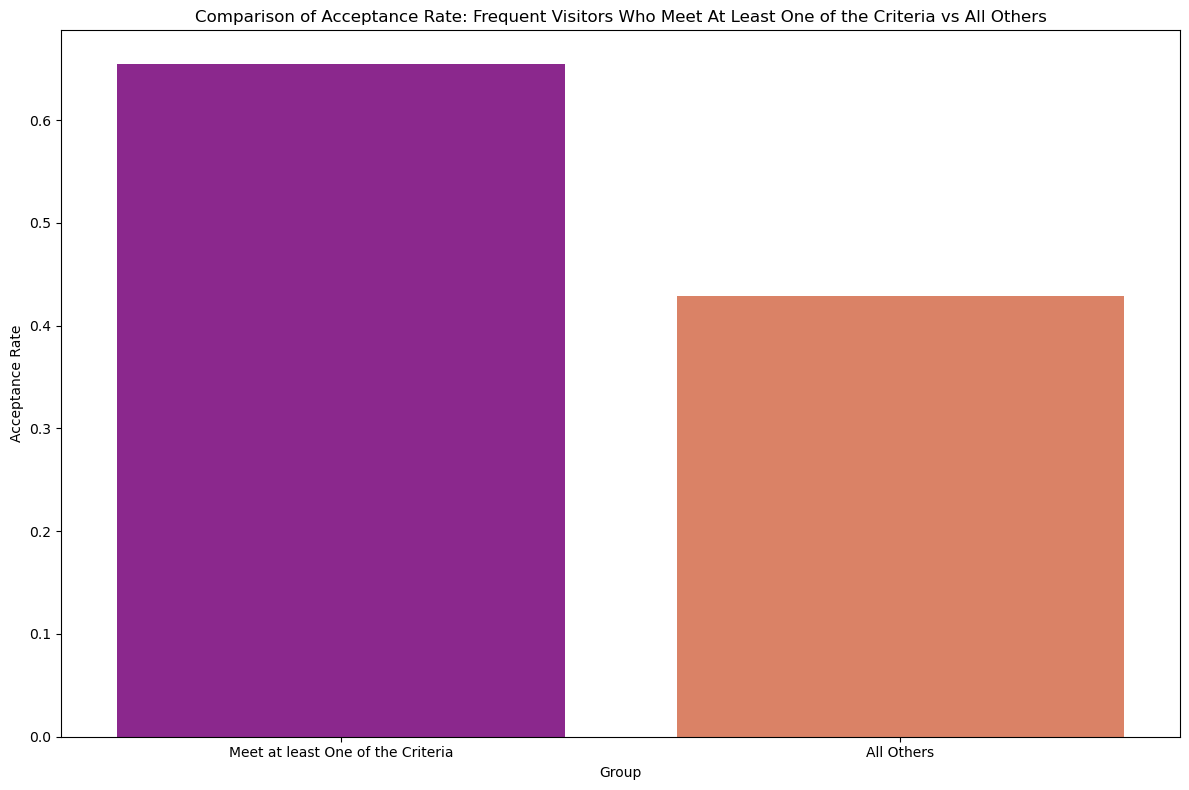

In [59]:
coffee_acceptance_rates = pd.DataFrame({
    'Group': ['Meet at least One of the Criteria', 'All Others'],
    'Acceptance Rate':[acceptance_rate_crit1_crit2, acceptance_rate_all_others]
})

plt.figure(figsize=(12, 8))
sns.barplot(data=coffee_acceptance_rates, x='Group', y='Acceptance Rate', palette='plasma')
plt.title('Comparison of Acceptance Rate: Frequent Visitors Who Meet At Least One of the Criteria vs All Others')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()

<br>
Based on this observation, we can conclude that drivers are likely to accept coffee coupons if they are frequent coffee house visitors who are under the age of 37 while driving to work or home, or they are frequent visitors who are single or unmarried and do not have children.

The acceptance rate of coffee coupons who meet one of these groups is 65.46% and the acceptance rate for all others is 42.89%

Overall, we can conclude that frequent coffee house visitors are likely to be young when accepting the coffee coupons while on the way to home or work, or these drivers are single or dating but have no children, suggesting that these drivers likely have less responsibilities and are probably more socially active and outgoing.

<h3><b>Final Observations</b></h3>

Based on the data recorded, we found that people who frequently visit bars, at least once a month, are more likely to accept a bar coupon. They are also likely to travel without kids, not be widowed, and be younger than 30 years old. The bar coupon accepters are also most likely to have a budget on spending as data suggests the income is lower than 50k.

For coffee coupons, as we narrowed down on a specific group, we found that the age group of the ones who are likely to accept coffee house coupon are likely to be younger than 37 years old and frequently visit, at least once a month. Out of this group, we found that 57% of this group had a destination of work or home. We also added group of people who are frequent visitors, but are single or unmarried and do not have children, and found that there is a 65% chance that someone who accepts a coffee house coupon meets one of this criteria.

Overall, it suggests that for both bar coupon and coffee house coupon, drivers that accepted these coupons are relatively young, have less family responsibilities and more socially outgoing.

Hypothesize: Coffee house coupons are likely to be accepted after work hours or before work hours, as data suggests a lot of people under the age of 37 who accepted a coupon had a destination of home or work.

<h4><b><u>Next steps</u></b></h4>

Further exploration should include time of day for coffee house coupons as well as other demographics and characterisics to narrow down specific attributes that affect the coupon acceptance rate.

The exploration could also include weather, to indicate which weather for people who visit coffee house frequently and are younger than 37 when on the way to home or work are likely to accept a coffee coupon or not, and also to find if time has a correlation with weather.

Another exploration could include finding the correlation between the distance to coffee shop and acceptance rate.